In [3]:
import pandas as pd
import json
from pygbif import species, occurrences

In [4]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)

# Termo de Perquisa

In [5]:
termo = 'Handroanthus' 
termo = 'Ursus'
espec = species.name_lookup(q=termo, limit=500)

In [6]:
# dir(species)

In [7]:
espec['count']

1054

# Transformando um resultado em um Dataframe

In [8]:
df = pd.DataFrame(espec['results'])

# O resultado da pesquisa é uma lista com dicionario

In [9]:
type(espec['results'])

list

# Converter uma lista em dataframe

In [10]:
lst = espec['results']

In [11]:
df =  pd.DataFrame(lst)

In [12]:
df.head(2)

,key,datasetKey,nubKey,parentKey,parent,kingdom,phylum,order,family,genus,...,publishedIn,accordingTo,extinct,constituentKey,species,speciesKey,acceptedKey,accepted,basionymKey,basionym
0,158192159,4cec8fef-f129-4966-89b7-4f8439aba058,2433406.0,158192149.0,Ursidae,Animalia,Chordata,Carnivora,Ursidae,Ursus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126908913,6cfd67d6-4f9b-400b-8549-1933ac27936f,2433406.0,162100897.0,Ursidae,NaN,Chordata,Carnivora,Ursidae,Ursus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.columns.values

array(['key', 'datasetKey', 'nubKey', 'parentKey', 'parent', 'kingdom',
       'phylum', 'order', 'family', 'genus', 'kingdomKey', 'phylumKey',
       'classKey', 'orderKey', 'familyKey', 'genusKey', 'scientificName',
       'canonicalName', 'authorship', 'nameType', 'taxonomicStatus',
       'rank', 'origin', 'numDescendants', 'numOccurrences', 'habitats',
       'nomenclaturalStatus', 'threatStatuses', 'descriptions',
       'vernacularNames', 'higherClassificationMap', 'synonym', 'class',
       'taxonID', 'publishedIn', 'accordingTo', 'extinct',
       'constituentKey', 'species', 'speciesKey', 'acceptedKey',
       'accepted', 'basionymKey', 'basionym'], dtype=object)

In [14]:
new_df = df[['key', 'scientificName', 'canonicalName', 'taxonomicStatus', 'rank', 'genus']]

In [15]:
new_df.head(3)

,key,scientificName,canonicalName,taxonomicStatus,rank,genus
0,158192159,Ursus,Ursus,ACCEPTED,GENUS,Ursus
1,126908913,Ursus,Ursus,ACCEPTED,GENUS,Ursus
2,160617728,Ursus,Ursus,ACCEPTED,GENUS,Ursus


In [27]:
especies = new_df.sort_values(['taxonomicStatus'], ascending=True).groupby(['taxonomicStatus'])['scientificName']

In [28]:
especies.value_counts()

taxonomicStatus      scientificName                         
ACCEPTED             Ursus                                      18
                     Ursus arctos Linnaeus, 1758                14
                     Ursus Linnaeus, 1758                       13
                     Ursus maritimus Phipps, 1774                8
                     Ursus americanus Pallas, 1780               7
                     Ensayara ursus Kilgallen, 2009              5
                     Ursus arctos                                5
                     Tinus ursus Carico, 1976                    4
                     Camponotus ursus Forel, 1886                3
                     Notomithrax ursus Herbst, 1788              3
                     Pheidole ursus Mayr, 1870                   3
                     Ursa Simon, 1895                            3
                     Ursus arctos Linnaeus 1758                  3
                     Ursus spec. Linnæus, 1758                   3
 

In [162]:
new_df1 = df[['key', 'scientificName', 'canonicalName', 'taxonomicStatus', 'rank', 'genus']]

In [164]:
new_df1

,key,scientificName,canonicalName,taxonomicStatus,rank,genus
0,103238785,Handroanthus,Handroanthus,ACCEPTED,GENUS,Handroanthus
1,147439966,Handroanthus,Handroanthus,ACCEPTED,GENUS,Handroanthus
2,135272305,Handroanthus,Handroanthus,ACCEPTED,GENUS,Handroanthus
3,160410972,Handroanthus,Handroanthus,ACCEPTED,GENUS,Handroanthus
4,155862778,Handroanthus,Handroanthus,ACCEPTED,GENUS,Handroanthus
5,157163838,Handroanthus,Handroanthus,ACCEPTED,GENUS,Handroanthus
6,144211899,Handroanthus,Handroanthus,ACCEPTED,GENUS,Handroanthus
7,134994524,Handroanthus,Handroanthus,ACCEPTED,GENUS,Handroanthus
8,144238573,Handroanthus,Handroanthus,ACCEPTED,GENUS,Handroanthus
9,160523097,Handroanthus,Handroanthus,ACCEPTED,GENUS,Handroanthus


In [39]:
df.taxonomicStatus.describe() # o termo mais comum encontrado é ACCEPTED

count          489
unique           5
top       ACCEPTED
freq           354
Name: taxonomicStatus, dtype: object

In [40]:
df.taxonomicStatus.value_counts().head() # dos 489 termos encontros 

ACCEPTED               354
SYNONYM                112
DOUBTFUL                15
HETEROTYPIC_SYNONYM      4
PROPARTE_SYNONYM         4
Name: taxonomicStatus, dtype: int64

In [41]:
354+112+15+4+4

489

In [42]:
df.taxonomicStatus.value_counts(normalize=True) # os valores estão em percetual

ACCEPTED               0.723926
SYNONYM                0.229039
DOUBTFUL               0.030675
HETEROTYPIC_SYNONYM    0.008180
PROPARTE_SYNONYM       0.008180
Name: taxonomicStatus, dtype: float64

In [43]:
%matplotlib inline

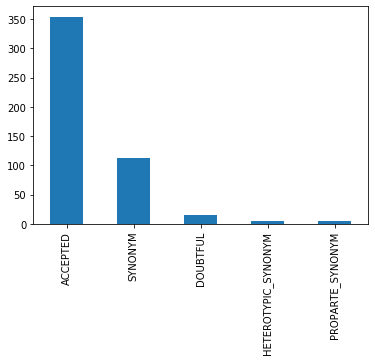

In [33]:
df.taxonomicStatus.value_counts().plot(kind='bar')

In [127]:
df = pd.DataFrame(espec['results'])

In [25]:
grupo1 = df.groupby([ 'key', 'scientificName', 'rank','taxonomicStatus' ])

In [26]:
for k, v in grupo1.groups.items():
    print(k)


(1051648, 'Peritrichia ursus (Olivier, 1789)', 'SPECIES', 'ACCEPTED')
(1060098, 'Isonychus ursus Moser, 1918', 'SPECIES', 'ACCEPTED')
(1081529, 'Bombodes ursus Westwood, 1848', 'SPECIES', 'ACCEPTED')
(1155527, 'Rhytiphora ursus (Breuning, 1938)', 'SPECIES', 'ACCEPTED')
(1163870, 'Rhynchites ursus Gebler, 1830', 'SPECIES', 'DOUBTFUL')
(1178267, 'Orthochaetes ursus Desbrochers, 1892', 'SPECIES', 'HOMOTYPIC_SYNONYM')
(1181238, 'Sitona ursus Desbrochers, 1894', 'SPECIES', 'ACCEPTED')
(1183696, 'Larinus ursus Germar, 1824', 'SPECIES', 'ACCEPTED')
(1185931, 'Crossotarsus ursus Schedl', 'SPECIES', 'DOUBTFUL')
(1200663, 'Otiorrhynchus ursus Gebler, 1845', 'SPECIES', 'DOUBTFUL')
(1212676, 'Strophomorphus ursus Desbrochers, 1875', 'SPECIES', 'HETEROTYPIC_SYNONYM')
(1223130, 'Amphicranus ursus Schedl, 1934c', 'SPECIES', 'DOUBTFUL')
(1224382, 'Lixus ursus Latreille, 1804', 'SPECIES', 'DOUBTFUL')
(1237236, 'Euscepes ursus Chevrolat, 1880', 'SPECIES', 'DOUBTFUL')
(1247108, 'Desmidophorus ursus Roelo

In [22]:
serie = grupo1.size()

In [23]:
series = serie.items()

In [24]:
type(series)

zip

In [ ]:
termo = 'Ursus'
termo = 'Handroanthus'
#termo = 'Handroanthus albus'
#termo = 'Poa pratensis'
#termo = 'Poa pratensis var. variegata Rchb.'

In [ ]:
especies = df.sort_values(['scientificName'], ascending=False).groupby(['scientificName'])['genus']

In [ ]:
df.groupby(['taxonomicStatus']).count()

In [ ]:
df